In [1]:
import matplotlib.pyplot as plt #импортируем библиотеку для рисования
import numpy as np              #импортируем библиотеку для вычислений

In [7]:
#задаем коэффициенты
O2_t_max = 20
C2 = 1
C4 = 1
K15 = 1                    # потребление кислорода неактивными тканями    

In [23]:
# задаем переменные диффуравнений
t=np.linspace(0,10,1000)   # массив отсчетов времени 0..10c с шагом 0.01с
n = len(t)                 # длина массива
dt = t[1] - t[0]           # шаг по времени
O2_l = np.zeros(n)         # парциальное давление О2 в легких
O2_t = np.zeros(n)         # парциальное давление О2 в теле
K11 = np.zeros(n)          # потребление кислорода мышцами

# задаем начальные условия
O2_l[0] = 18               
O2_t[0] = 16
K11[100:200] = 5  # два интервала по 1с с нагрузкой
K11[500:600] = 5


# численно решаем уравнения
for i in range(n - 1):   
    MOD = C2 * (1 - O2_t[i] / O2_t_max) # легочная венитляция
    MOK = C4 * (1 - O2_t[i] / O2_t_max) # перенос кислорода из легких в тело
    lung2body = MOK*(O2_l[i] - O2_t[i])
    O2_t_dt = lung2body - K11[i] - K15
    O2_l_dt = MOD * (20 - O2_l[i]) - lung2body
    O2_l[i + 1] =  O2_l[i] + O2_l_dt * dt
    O2_t[i + 1] =  O2_t[i] + O2_t_dt * dt

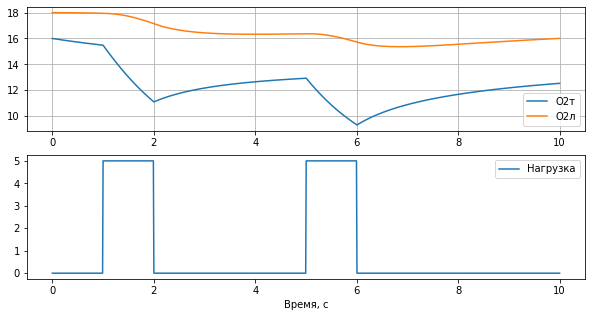

In [24]:
# рисуем графики
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(211)
o2t_label, = ax.plot(t, O2_t)
o2l_label, = ax.plot(t, O2_l)
ax.legend([o2t_label, o2l_label], ['O2т', 'O2л'], loc='lower right')
ax.grid(True)

ax2 = fig.add_subplot(212, sharex = ax)
K11_label, = ax2.plot(t, K11)
ax2.set_xlabel('Время, с')
ax2.legend([K11_label], ['Нагрузка'], loc='upper right')
